In [1]:
import pandas as pd
from matplotlib import pyplot as mp
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("E:\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


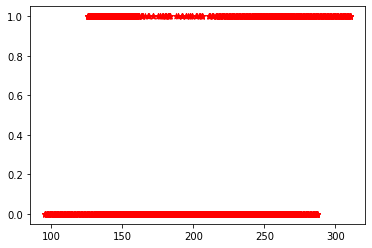

In [3]:
mp.scatter(df.average_montly_hours, df.left, marker = '*', color = 'red')

In [4]:
left = df[df.left==1]
retained = df[df.left==0]

In [5]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

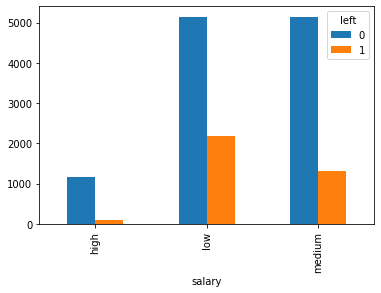

In [6]:
pd.crosstab(df.salary, df.left).plot(kind = 'bar')

<AxesSubplot:xlabel='sales'>

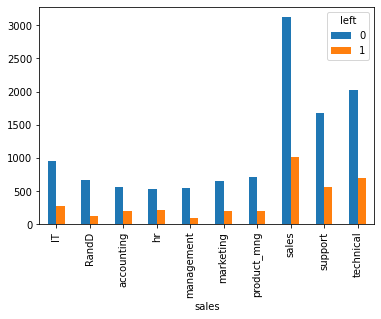

In [7]:
pd.crosstab(df.sales, df.left).plot(kind = 'bar')

<AxesSubplot:xlabel='promotion_last_5years'>

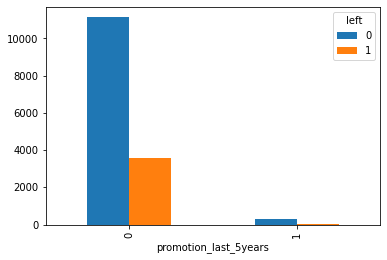

In [8]:
pd.crosstab(df.promotion_last_5years,df.left).plot(kind = 'bar')

In [9]:
subdf = df[['satisfaction_level','average_montly_hours','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,average_montly_hours,promotion_last_5years,salary
0,0.38,157,157,0,low
1,0.80,262,262,0,medium
2,0.11,272,272,0,medium
3,0.72,223,223,0,low
4,0.37,159,159,0,low


In [10]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [11]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,157,0,low,0,1,0
1,0.80,262,262,0,medium,0,0,1
2,0.11,272,272,0,medium,0,0,1
3,0.72,223,223,0,low,0,1,0
4,0.37,159,159,0,low,0,1,0


In [12]:
df_with_dummies.drop(columns = 'salary',inplace= True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,157,0,0,1,0
1,0.80,262,262,0,0,0,1
2,0.11,272,272,0,0,0,1
3,0.72,223,223,0,0,1,0
4,0.37,159,159,0,0,1,0


In [13]:
x = df_with_dummies
x.head()

,satisfaction_level,average_montly_hours,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,157,0,0,1,0
1,0.80,262,262,0,0,0,1
2,0.11,272,272,0,0,0,1
3,0.72,223,223,0,0,1,0
4,0.37,159,159,0,0,1,0


In [14]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [17]:
model.fit(x_train, y_train)

C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
model.predict(x_test)

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [19]:
model.score(x_test, y_test)

0.7815555555555556

In [20]:
model.predict_proba(x_test)

array([[0.24968097, 0.75031903],
       [0.8736714 , 0.1263286 ],
       [0.87875123, 0.12124877],
       ...,
       [0.26761626, 0.73238374],
       [0.84142968, 0.15857032],
       [0.48664835, 0.51335165]])